<a href="https://colab.research.google.com/github/RifatulHidayah/Project-Dibimbing/blob/main/studentscoredibimbing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

LOAD DATASET


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/AI/student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


DATA PREPROCESSING

In [ ]:
duplicates = dataset.duplicated()
print(f"Duplicate Rows: {duplicates}")

Duplicate Rows: 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool


In [ ]:
missing_values = dataset.isnull()
print("Missing Values:\n", missing_values)

Missing Values:
     Hours  Scores
0   False   False
1   False   False
2   False   False
3   False   False
4   False   False
5   False   False
6   False   False
7   False   False
8   False   False
9   False   False
10  False   False
11  False   False
12  False   False
13  False   False
14  False   False
15  False   False
16  False   False
17  False   False
18  False   False
19  False   False
20  False   False
21  False   False
22  False   False
23  False   False
24  False   False


OUTLIER ANALYSIS

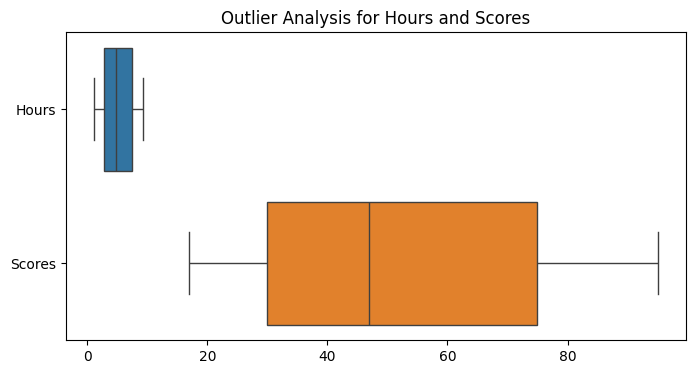

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=dataset, orient="h")
plt.title("Outlier Analysis for Hours and Scores")
plt.show()

FEATURE SELECTION

In [ ]:
X = dataset[['Hours']]
y = dataset['Scores']


MODEL TRAINING


In [ ]:
splits = [0.2, 0.3, 0.4]

for test_size in splits:
    print(f"\nTrain-Test Split: {1-test_size:.0%} Train / {test_size:.0%} Test")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize models
    lin_reg = LinearRegression()
    tree_reg = DecisionTreeRegressor(random_state=42)
    rf_reg = RandomForestRegressor(random_state=42)

    # Train models
    lin_reg.fit(X_train, y_train)
    tree_reg.fit(X_train, y_train)
    rf_reg.fit(X_train, y_train)

    # Predictions
    y_pred_lin = lin_reg.predict(X_test)
    y_pred_tree = tree_reg.predict(X_test)
    y_pred_rf = rf_reg.predict(X_test)

    #Evaluation
    from sklearn.metrics import mean_squared_error, r2_score

    mse_lin = mean_squared_error(y_test, y_pred_lin)
    r2_lin = r2_score(y_test, y_pred_lin)

    mse_tree = mean_squared_error(y_test, y_pred_tree)
    r2_tree = r2_score(y_test, y_pred_tree)

    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)


    print("Linear Regression:")
    print(f"MSE: {mse_lin:.2f}, R²: {r2_lin:.3f}")

    print("\nDecision Tree Regressor:")
    print(f"MSE: {mse_tree:.2f}, R²: {r2_tree:.3f}")

    print("\nRandom Forest Regressor:")
    print(f"MSE: {mse_rf:.2f}, R²: {r2_rf:.3f}")


Train-Test Split: 80% Train / 20% Test
Linear Regression:
MSE: 18.94, R²: 0.968

Decision Tree Regressor:
MSE: 31.70, R²: 0.946

Random Forest Regressor:
MSE: 13.05, R²: 0.978

Train-Test Split: 70% Train / 30% Test
Linear Regression:
MSE: 23.62, R²: 0.949

Decision Tree Regressor:
MSE: 61.25, R²: 0.867

Random Forest Regressor:
MSE: 43.59, R²: 0.905

Train-Test Split: 60% Train / 40% Test
Linear Regression:
MSE: 21.82, R²: 0.951

Decision Tree Regressor:
MSE: 52.40, R²: 0.883

Random Forest Regressor:
MSE: 34.02, R²: 0.924


KESIMPULAN

Random Forest menggunakan skenario 80%/20% adalah model paling baik (akurat), karena memiliki nilai sangat dekat dengan angka 1
Sedangkan, dari ketiganya Decision Tree kurang efektif

SARAN

Cobalah menambah eksperimen dalam feature engineering